### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [16]:
# veo que todas las hojas tienen los mismos encabezados asi que me gustaria unir todas esas hojas por encabezados en una sola hoja llama hojaCompleta

import pandas as pd
hojaCompleta = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)





,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Tienda
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Tienda 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Tienda 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Tienda 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Tienda 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Tienda 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Tienda 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Tienda 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Tienda 4


La tienda que tuvo menos ventas fue 'AC' con un total de $2804.44
La tienda que tuvo más ventas fue 'SP' con un total de $2419806.94


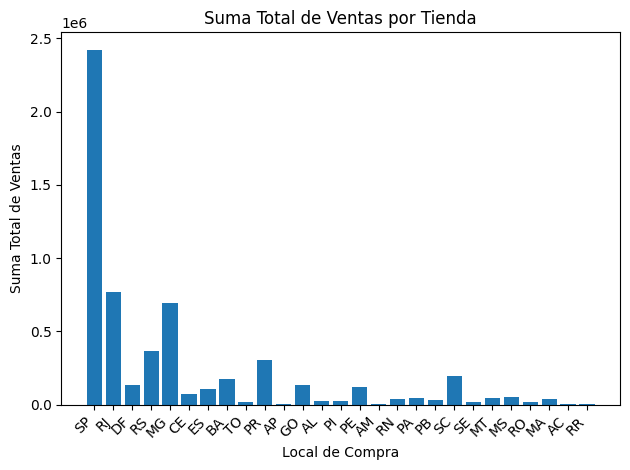

In [31]:
from matplotlib import pyplot as plt
import pandas as pd  # Importamos pandas nuevamente ya que iterrows() se usa en DataFrames

# 1. Crear un diccionario para almacenar la suma de precios por tienda
ventas_por_tienda = {}

# 2. Iterar sobre cada fila en 'hojaCompleta' usando iterrows()
for index, compra in hojaCompleta.iterrows():
    tienda = compra['Local da compra']
    precio = compra['Preço']

    # 3. Sumar el precio a la tienda correspondiente en el diccionario
    if tienda in ventas_por_tienda:
        ventas_por_tienda[tienda] += precio
    else:
        ventas_por_tienda[tienda] = precio

# 4. Encontrar la tienda con menos y más ventas
tienda_menos_ventas = min(ventas_por_tienda, key=ventas_por_tienda.get)
tienda_mas_ventas = max(ventas_por_tienda, key=ventas_por_tienda.get)
monto_menos_ventas = ventas_por_tienda[tienda_menos_ventas]
monto_mas_ventas = ventas_por_tienda[tienda_mas_ventas]

# 5. Imprimir los mensajes
print(f"La tienda que tuvo menos ventas fue '{tienda_menos_ventas}' con un total de ${monto_menos_ventas:.2f}")
print(f"La tienda que tuvo más ventas fue '{tienda_mas_ventas}' con un total de ${monto_mas_ventas:.2f}")

# 6. Separar las tiendas y las sumas de precios para el gráfico
tiendas = list(ventas_por_tienda.keys())
suma_precios = list(ventas_por_tienda.values())

# 7. Crear el gráfico de barras con Matplotlib
plt.bar(tiendas, suma_precios)

# Añadir etiquetas y título
plt.xlabel('Local de Compra')
plt.ylabel('Suma Total de Ventas')
plt.title('Suma Total de Ventas por Tienda')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
